In [3]:
import pandas as pd
import numpy as np
import scipy as sc
import json
import matplotlib.pyplot as plt
from colour import Color

In [4]:
import os
os.listdir('.')

['HmmStock.ipynb',
 'Final_updated_symbol_list.csv',
 'runcorr.py',
 'gephi-0.9.2-linux.tar.gz',
 'Symbol.json',
 'network.ipynb',
 'learn_networkx.ipynb',
 '.ipynb_checkpoints',
 'StockCorr.graphml',
 'graph-tool-2.26.tar.bz2',
 'StockGroups - Copy 2.csv',
 'networkStockStudyMeta.h5',
 'plotgraph.py',
 'correlation_1.h5',
 'data.h5',
 'correlations']

In [5]:
storekeys=store.keys()

In [12]:
symb='AAPL'
symb+'/' in storekeys

False

In [15]:
dfmeta=pd.read_csv('Final_updated_symbol_list.csv')
dfmeta=dfmeta[(~pd.isnull(dfmeta['Sector'])) & (~pd.isnull(dfmeta['Industry'])) ]
store=pd.HDFStore('data.h5')

for ind in dfmeta.index:
    symb=dfmeta.loc[ind,'Symbol']
    if '/'+symb in storekeys: 
        df=store[symb]
        dfmeta.loc[ind,'LastClose']=df.iloc[-1]['Close']
        dfmeta.loc[ind,'AvgVol']=df['Volume'].mean()
        try:
            dfmeta.loc[ind,'Perf1month']=(df.iloc[-1]['Close']-df.iloc[-30]['Close'])/df.iloc[-30]['Close']
        except:
            pass
        try:
            dfmeta.loc[ind,'Perf1week']=(df.iloc[-1]['Close']-df.iloc[-7]['Close'])/df.iloc[-7]['Close']
        except:
            pass
        try:
            dfmeta.loc[ind,'Perf3month']=(df.iloc[-1]['Close']-df.iloc[-90]['Close'])/df.iloc[-90]['Close']
        except:
            pass
        try:
            dfmeta.loc[ind,'Perf6month']=(df.iloc[-1]['Close']-df.iloc[-180]['Close'])/df.iloc[-180]['Close']
        except:
            pass

In [17]:
dfmeta.to_hdf('networkStockStudyMeta.h5','table')

In [5]:
dfmeta=pd.read_hdf('networkStockStudyMeta.h5','table')

In [6]:
dfmeta

,Unnamed: 0,Symbol,Sector,MarketCap,Industry,ETF,Name,LastClose,AvgVol,Perf1month,Perf1week,Perf3month,Perf6month
0,17,A,Capital Goods,23276679025.62,Biotechnology: Laboratory Analytical Instruments,N,"Agilent Technologies, Inc.",71.129997,1.926917e+06,-0.049318,0.055654,0.053934,0.173569
1,21,AA,Basic Industries,10544456723.71,Aluminum,N,Alcoa Corporation Common Stock,47.860001,4.070375e+06,-0.113704,0.061904,0.009279,0.606040
2,22,AAAP,Health Care,3454032566.16,Major Pharmaceuticals,N,Advanced Accelerator Applications S.A.,0.600000,2.868509e+05,-0.992669,-0.992650,-0.991740,-0.983393
3,23,AABA,Technology,64752249961.52,EDP Services,N,Altaba Inc.,NaN,NaN,NaN,NaN,NaN,NaN
4,24,AAC,Health Care,216706157.01,"Food, Beverage & Tobacco",N,AUSTRALIAN AGRICULTURAL COMPANY LIMITED.,11.970000,1.412601e+05,0.305344,0.236570,0.459756,0.655602
8,28,AAL,Transportation,27829506085.68,Energy,N,"American Airlines Group, Inc.",56.070000,5.594243e+06,0.056529,0.048429,0.186667,0.144987
9,29,AAMC,Finance,114040019.44299999,Real Estate,N,Altisource Asset Management Corp,65.550003,4.807115e+03,-0.038151,0.003828,-0.216378,-0.279274
10,30,AAME,Finance,68369829.795,Life Insurance,N,Atlantic American Corporation,3.350000,2.846245e+03,-0.069444,-0.014706,-0.056338,-0.094595
11,31,AAN,Technology,2932163360.4,Diversified Commercial Services,N,"Aaron&#39;s, Inc.",47.959999,8.423300e+05,0.124238,0.032508,0.293769,0.242487
12,32,AAOI,Technology,658994324.0,Semiconductors,N,"Applied Optoelectronics, Inc.",28.700001,2.578432e+06,-0.202556,0.031632,-0.318613,-0.548600


In [194]:
list(dfmeta['Sector'].unique())

['Capital Goods',
 'Basic Industries',
 'Health Care',
 'Technology',
 'Transportation',
 'Finance',
 'Consumer Services',
 'Energy',
 'n/a',
 'Consumer Non-Durables',
 'Consumer Durables',
 'Miscellaneous',
 'Public Utilities']

In [196]:
print len(list(dfmeta['Industry'].unique()))
list(dfmeta['Industry'].unique())

154


['Biotechnology: Laboratory Analytical Instruments',
 'Aluminum',
 'Major Pharmaceuticals',
 'EDP Services',
 'Food, Beverage & Tobacco',
 'Energy',
 'Real Estate',
 'Life Insurance',
 'Diversified Commercial Services',
 'Semiconductors',
 'Industrial Machinery/Components',
 'Computer Manufacturing',
 'Real Estate Investment Trusts',
 'Media',
 'Oil & Gas Production',
 'Transportation Services',
 'n/a',
 'Ordnance And Accessories',
 'Investment Managers',
 'Farming/Seeds/Milling',
 'Electrical Products',
 'Other Pharmaceuticals',
 'Major Banks',
 'Publishing',
 'Beverages (Production/Distribution)',
 'Automotive Aftermarket',
 'Business Services',
 'Biotechnology: In Vitro & In Vivo Diagnostic Substances',
 'Biotechnology: Biological Products (No Diagnostic Substances)',
 'Medical/Dental Instruments',
 'Materials',
 'Investment Bankers/Brokers/Service',
 'Savings Institutions',
 'Property-Casualty Insurers',
 'Medical Specialities',
 'Computer Software: Prepackaged Software',
 'Militar

In [3]:
Symbols=store.keys()

In [4]:
Symbols=[ss[1:] for ss in Symbols]
Symbols

['A',
 'AA',
 'AAAP',
 'AAC',
 'AADR',
 'AAL',
 'AAMC',
 'AAME',
 'AAN',
 'AAOI',
 'AAON',
 'AAP',
 'AAPL',
 'AAT',
 'AAV',
 'AAWW',
 'AAXJ',
 'AB',
 'ABAC',
 'ABAX',
 'ABB',
 'ABBV',
 'ABC',
 'ABCB',
 'ABCD',
 'ABDC',
 'ABE',
 'ABEV',
 'ABG',
 'ABLT',
 'ABLX',
 'ABM',
 'ABMD',
 'ABNK',
 'ABR',
 'ABT',
 'ABX',
 'AC',
 'ACAD',
 'ACBI',
 'ACC',
 'ACCO',
 'ACER',
 'ACET',
 'ACFC',
 'ACGL',
 'ACH',
 'ACHC',
 'ACHN',
 'ACIA',
 'ACIM',
 'ACIU',
 'ACIW',
 'ACLS',
 'ACM',
 'ACMR',
 'ACN',
 'ACNB',
 'ACOR',
 'ACP',
 'ACR',
 'ACRE',
 'ACRX',
 'ACSF',
 'ACSI',
 'ACST',
 'ACT',
 'ACTA',
 'ACTG',
 'ACU',
 'ACV',
 'ACWI',
 'ACWV',
 'ACWX',
 'ACXM',
 'ACY',
 'ADBE',
 'ADC',
 'ADES',
 'ADI',
 'ADKT',
 'ADM',
 'ADMA',
 'ADMP',
 'ADMS',
 'ADOM',
 'ADP',
 'ADRA',
 'ADRD',
 'ADRE',
 'ADRU',
 'ADS',
 'ADSK',
 'ADSW',
 'ADT',
 'ADTN',
 'ADUS',
 'ADV',
 'ADX',
 'ADXS',
 'ADZ',
 'AE',
 'AEB',
 'AED',
 'AEE',
 'AEG',
 'AEGN',
 'AEH',
 'AEHR',
 'AEI',
 'AEIS',
 'AEK',
 'AEL',
 'AEM',
 'AEO',
 'AEP',
 'AER',
 'A

In [5]:
with open('Symbol.json','w') as F:
    json.dump(Symbols,F)

In [7]:
with open('Symbol.json','r') as F:
    Symbols=json.load(F)

In [7]:
Symbols

[u'A',
 u'AA',
 u'AAAP',
 u'AAC',
 u'AADR',
 u'AAL',
 u'AAMC',
 u'AAME',
 u'AAN',
 u'AAOI',
 u'AAON',
 u'AAP',
 u'AAPL',
 u'AAT',
 u'AAV',
 u'AAWW',
 u'AAXJ',
 u'AB',
 u'ABAC',
 u'ABAX',
 u'ABB',
 u'ABBV',
 u'ABC',
 u'ABCB',
 u'ABCD',
 u'ABDC',
 u'ABE',
 u'ABEV',
 u'ABG',
 u'ABLT',
 u'ABLX',
 u'ABM',
 u'ABMD',
 u'ABNK',
 u'ABR',
 u'ABT',
 u'ABX',
 u'AC',
 u'ACAD',
 u'ACBI',
 u'ACC',
 u'ACCO',
 u'ACER',
 u'ACET',
 u'ACFC',
 u'ACGL',
 u'ACH',
 u'ACHC',
 u'ACHN',
 u'ACIA',
 u'ACIM',
 u'ACIU',
 u'ACIW',
 u'ACLS',
 u'ACM',
 u'ACMR',
 u'ACN',
 u'ACNB',
 u'ACOR',
 u'ACP',
 u'ACR',
 u'ACRE',
 u'ACRX',
 u'ACSF',
 u'ACSI',
 u'ACST',
 u'ACT',
 u'ACTA',
 u'ACTG',
 u'ACU',
 u'ACV',
 u'ACWI',
 u'ACWV',
 u'ACWX',
 u'ACXM',
 u'ACY',
 u'ADBE',
 u'ADC',
 u'ADES',
 u'ADI',
 u'ADKT',
 u'ADM',
 u'ADMA',
 u'ADMP',
 u'ADMS',
 u'ADOM',
 u'ADP',
 u'ADRA',
 u'ADRD',
 u'ADRE',
 u'ADRU',
 u'ADS',
 u'ADSK',
 u'ADSW',
 u'ADT',
 u'ADTN',
 u'ADUS',
 u'ADV',
 u'ADX',
 u'ADXS',
 u'ADZ',
 u'AE',
 u'AEB',
 u'AED',
 u'AEE

In [ ]:
import pandas as pd
import numpy as np
import scipy as sc
import json
import matplotlib.pyplot as plt

with open('Symbol.json','r') as F:
    Symbols=json.load(F)

N=len(Symbols)
T0=pd.datetime(2018,1,1).date()
Tf=pd.datetime(2018,3,9).date()
A=np.zeros((N,N))
V=np.zeros((N,N))
for i in range(0,len(Symbols)):
    print i
    s1=Symbols[i]
    x=store[s1].loc[T0:Tf,'Close'].values
    x=x-min(x)
    a=max(x)
    x=x/a
    for j in range(i,len(Symbols)):
        try:
            s2=Symbols[j]
            y=store[s2].loc[T0:Tf,'Close'].values
            y=y-min(y)
            b=max(y)
            y=y/b

            n=min(len(x),len(y))
            A[i,j]=np.corrcoef(x[0:n],y[0:n])[0,1]
        except:
            A[i,j]=np.nan

with open('CloseCorr.npz','w') as F:
    np.save(F,A)           

0


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:3154: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:3088: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:3088: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


1
2


/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:3162: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:3163: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


Exception KeyboardInterrupt in <bound method Array.__del__ of /CTWS/block1_values (Array(253, 1), zlib(9)) ''
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (253, 1)> ignored
Exception KeyboardInterrupt in <bound method VLArray.__del__ of /CXH/block1_items (VLArray(1,), zlib(9)) ''
  atom = ObjectAtom()
  byteorder = 'irrelevant'
  nrows = 1
  flavor = 'numpy'> ignored


In [4]:
N=len(Symbols)
Aall=np.zeros((N,N))
for i in range(N):
    print i
    with open('correlations/CloseCorr_'+str(i)+'.npz','r') as F:
        A=np.load(F)
        Aall[i,:]=A[0,:]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065


3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745


5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472


In [5]:
Aall

array([[ 1.        ,  0.54074163,  0.13201462, ...,  0.26109901,
         0.56758115,  0.31200296],
       [ 0.        ,  1.        ,  0.50992108, ..., -0.43124778,
         0.81838037,  0.70964098],
       [ 0.        ,  0.        ,  1.        , ..., -0.65866894,
         0.39437087,  0.61898542],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.22108434, -0.69592591],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.47186629],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [7]:
print Aall.shape
B=Aall-np.diag(np.diagonal(Aall))
Asym=B.transpose()+Aall

(6972, 6972)


In [9]:
df=pd.DataFrame(Asym,columns=Symbols,index=Symbols)
df.to_hdf('correlation_1.h5','table')
df

/usr/local/lib/python2.7/dist-packages/pandas/io/pytables.py:270: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->unicode,key->axis0] [items->None]

  f(store)
/usr/local/lib/python2.7/dist-packages/pandas/io/pytables.py:270: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->unicode,key->axis1] [items->None]

  f(store)
/usr/local/lib/python2.7/dist-packages/pandas/io/pytables.py:270: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->unicode,key->block0_items] [items->None]

  f(store)


,A,AA,AAAP,AAC,AADR,AAL,AAMC,AAME,AAN,AAOI,...,ZNGA,ZNH,ZOES,ZROZ,ZSL,ZTO,ZTR,ZTS,ZUMZ,ZYNE
A,1.000000,0.540742,0.132015,0.050618,0.857770,0.513821,0.019288,0.684228,-0.025436,0.351894,...,0.318790,-0.050851,0.027654,0.376831,-0.667291,0.279938,0.491537,0.261099,0.567581,0.312003
AA,0.540742,1.000000,0.509921,-0.028485,0.646865,0.470128,0.751373,0.177831,-0.489411,0.825546,...,0.838925,-0.664283,0.509842,0.919429,-0.850778,0.312086,0.837087,-0.431248,0.818380,0.709641
AAAP,0.132015,0.509921,1.000000,-0.331206,-0.051456,-0.047145,0.296824,-0.208275,-0.752287,0.612517,...,0.331252,-0.604872,0.072423,0.534248,-0.458789,0.211984,0.711987,-0.658669,0.394371,0.618985
AAC,0.050618,-0.028485,-0.331206,1.000000,0.315383,0.448782,-0.017569,0.095161,0.749481,-0.335712,...,0.247686,0.193589,0.583557,-0.015003,0.015077,0.644928,-0.379571,0.600079,0.044549,-0.504197
AADR,0.857770,0.646865,-0.051456,0.315383,1.000000,0.725629,0.270033,0.627691,0.143722,0.377023,...,0.589986,-0.092084,0.430171,0.518058,-0.686320,0.472472,0.428661,0.325034,0.673401,0.247002
AAL,0.513821,0.470128,-0.047145,0.448782,0.725629,1.000000,0.177161,0.232576,0.281020,0.109865,...,0.473539,-0.162030,0.510211,0.403784,-0.391802,0.601213,0.267485,0.295860,0.572342,-0.096927
AAMC,0.019288,0.751373,0.296824,-0.017569,0.270033,0.177161,1.000000,-0.158912,-0.454338,0.719139,...,0.816230,-0.666314,0.653466,0.785852,-0.544482,0.112775,0.603723,-0.578362,0.546755,0.620152
AAME,0.684228,0.177831,-0.208275,0.095161,0.627691,0.232576,-0.158912,1.000000,0.171829,0.062363,...,0.046440,0.401536,-0.021755,0.118916,-0.392525,0.134380,0.096831,0.431279,0.236111,0.174057
AAN,-0.025436,-0.489411,-0.752287,0.749481,0.143722,0.281020,-0.454338,0.171829,1.000000,-0.681844,...,-0.235591,0.545119,0.184805,-0.486747,0.341788,0.413837,-0.722922,0.896904,-0.278818,-0.768772
AAOI,0.351894,0.825546,0.612517,-0.335712,0.377023,0.109865,0.719139,0.062363,-0.681844,1.000000,...,0.717634,-0.697808,0.317391,0.832618,-0.714927,0.039160,0.858091,-0.635163,0.655281,0.845058


In [8]:
df=pd.read_hdf('correlation_1.h5','table')

In [56]:
np.around(100*0.5674)/100

0.56999999999999995

In [26]:
import networkx as nx
G = nx.Graph()
for i in range(1000):
    for j in range(i+1,1000):
        if df.loc[df.index[i],df.columns[j]]>0.95:
            capacity = np.round(100*df.loc[df.index[i],df.columns[j]])
            G.add_edge(df.index[i],df.columns[j],capacity=capacity )

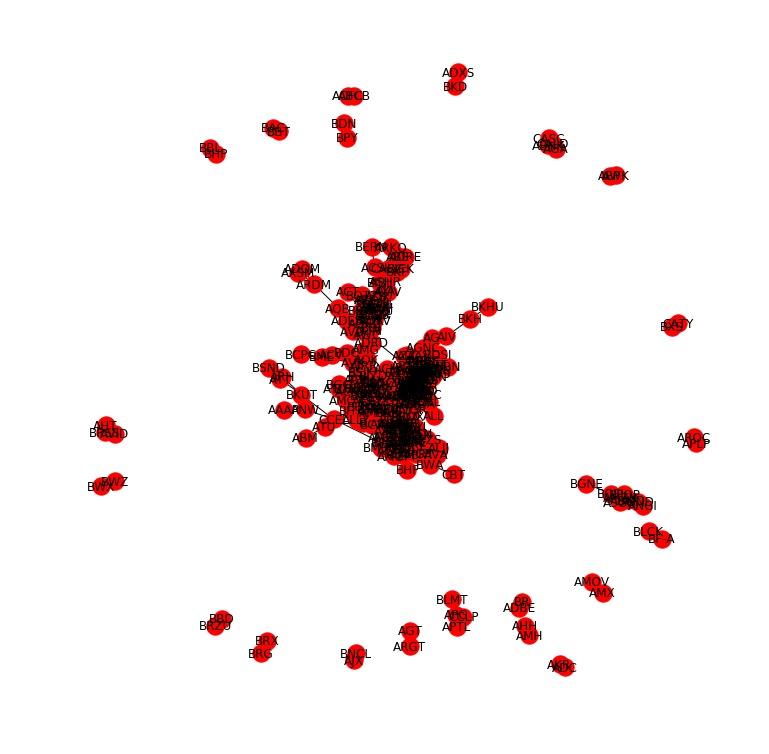

In [27]:
plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True)
plt.show()

In [11]:
red = Color("red")
colors = list(red.range_to(Color("green"),10))
for s in list(colors):
    print str(s)

red
#f13600
#e36500
#d58e00
#c7b000
#a4b800
#72aa00
#459c00
#208e00
green


In [145]:
colors

<generator object range_to at 0x7fc3393d2050>

In [12]:
max_perf=max(perfs,key=lambda x: x[1])[1]
min_perf=min(perfs,key=lambda x: x[1])[1]
bins=np.linspace(min_perf,max_perf,11)
bins

NameError: name 'perfs' is not defined

In [28]:
perfs=dfmeta[['Symbol','Perf1month']].values.tolist()
max_perf=max(perfs,key=lambda x: x[1])[1]
min_perf=min(perfs,key=lambda x: x[1])[1]
bins=[-100,-50,-10,0,5,10,20,50,75,100]
for i in range(len(perfs)):
    perfs[i].append(np.digitize(perfs[i][1],bins))


perfs

[['A', -0.04931840417000789, array(3)],
 ['AA', -0.11370368518518524, array(3)],
 ['AAAP', -0.9926686213425524, array(3)],
 ['AABA', nan, array(10)],
 ['AAC', 0.30534351145038174, array(4)],
 ['AAL', 0.05652911249293386, array(4)],
 ['AAMC', -0.03815112140422236, array(3)],
 ['AAME', -0.06944444444444445, array(3)],
 ['AAN', 0.12423813877168324, array(4)],
 ['AAOI', -0.20255628215858384, array(3)],
 ['AAON', 0.04269969814599719, array(4)],
 ['AAP', -0.038660611765291314, array(3)],
 ['AAPL', 0.04938488278773488, array(4)],
 ['AAT', -0.09693737004776623, array(3)],
 ['AAU', nan, array(10)],
 ['AAV', -0.19444444444444448, array(3)],
 ['AAWW', 0.028404361851440667, array(4)],
 ['AAXJ', -0.047425137724550856, array(3)],
 ['AAXN', nan, array(10)],
 ['AB', -0.021543985637342958, array(3)],
 ['ABAC', -0.15807560137457044, array(3)],
 ['ABAX', -0.053097306209183674, array(3)],
 ['ABB', -0.13951045454545458, array(3)],
 ['ABBV', -0.03181558340894064, array(3)],
 ['ABC', -0.06143347379313211, ar

In [188]:
# plt.figure()
# plt.hist(,100)
# plt.show()


array([ -9.92668621e-01,  -1.49361413e-01,  -9.43720308e-02,
        -6.18453896e-02,  -3.92015847e-02,  -1.99121299e-02,
         0.00000000e+00,   2.63391969e-02,   8.41629912e-02,
         6.96463768e+02])

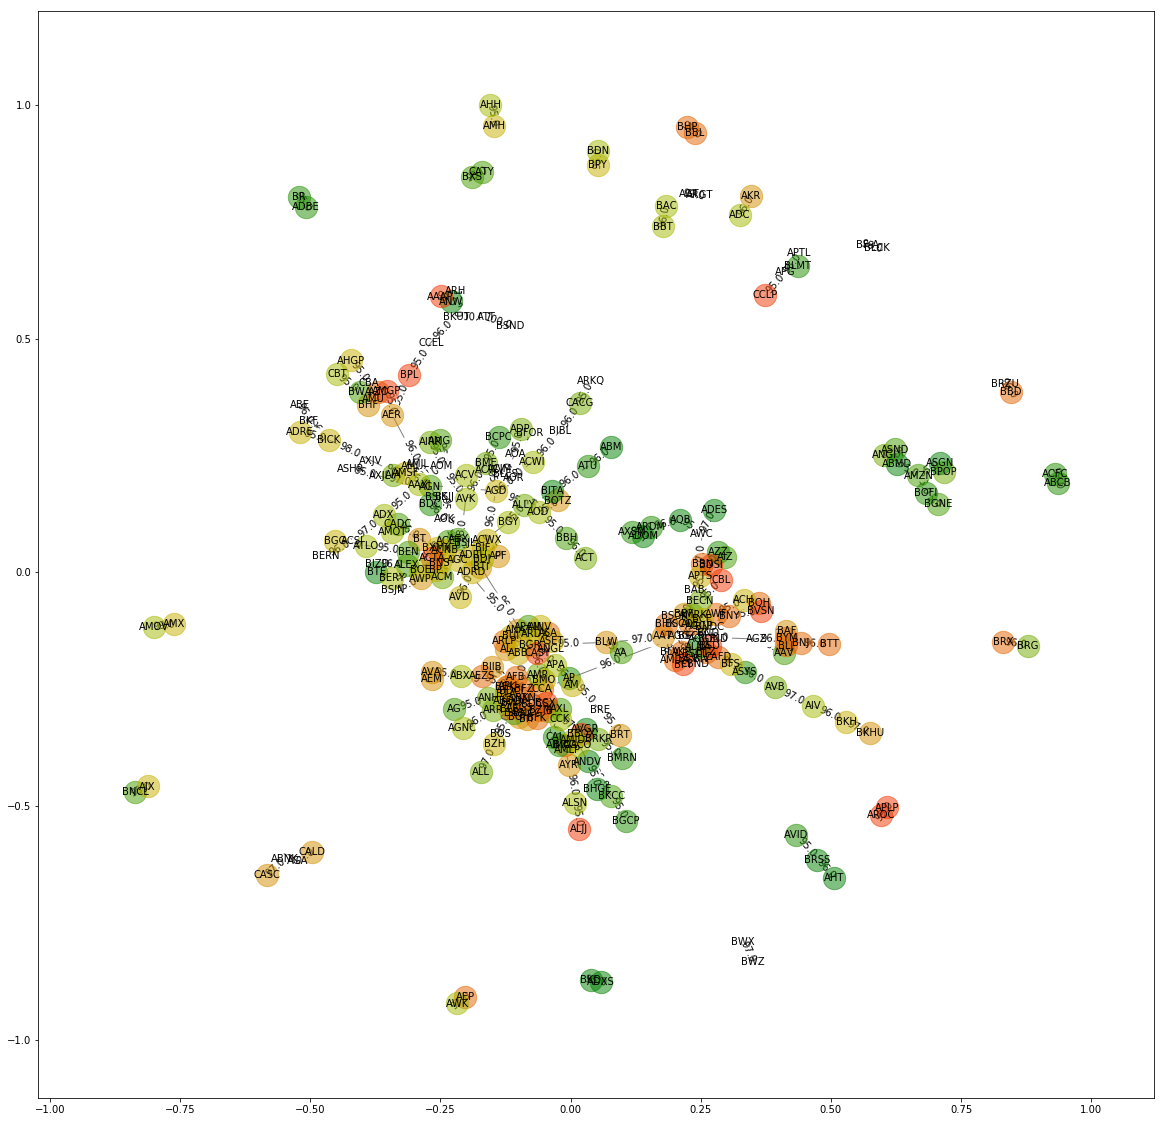

In [29]:
T=nx.minimum_spanning_tree(G)
pos = nx.spring_layout(T)


perfs=dfmeta[['Symbol','Perf1week']].values.tolist()
max_perf=max(perfs,key=lambda x: x[1])[1]
min_perf=min(perfs,key=lambda x: x[1])[1]
# bins=[-100,-50,-10,0,5,10,20,50,75,100]
bins=np.nanpercentile(map(lambda x: x[1],perfs),np.linspace(0,100,10))
for i in range(len(perfs)):
    perfs[i].append(np.digitize(perfs[i][1],bins))

Tnodes=list(T.nodes)

node_bin_colors={str(c):[] for c in colors}
for i in range(len(colors)):
    node_bin_colors[str(colors[i])]=  map(lambda x: x[0], filter(lambda x: x[2]==i and x[0] in Tnodes, perfs))



plt.figure(figsize=(20,20))



# nx.draw(T,pos=pos,with_labels=True)
for colr, nodes in node_bin_colors.items():
    nx.draw_networkx_nodes(T,pos,
                           node_color=colr,
                           nodelist=nodes,
                           node_size=500,
                           alpha=0.5,with_labels=True)
nx.draw_networkx_labels(T,pos,font_size=10)

# edges
nx.draw_networkx_edges(T,pos,width=1.0,alpha=0.5)
edgelabels = nx.get_edge_attributes(T,'capacity')
nx.draw_networkx_edge_labels(T,pos,edge_labels=edgelabels)

plt.show()

# plt.figure(figsize=(10,10))
# nx.draw_circular(T, with_labels=True)
# plt.show()

# plt.figure(figsize=(10,10))
# nx.draw_spectral(T, with_labels=True)
# plt.show()

# plt.figure(figsize=(10,10))
# nx.draw_spring(T, with_labels=True)
# plt.show()

In [79]:
len(S)

58

In [1]:
from graph_tool.all import *

In [2]:
from __future__ import division, absolute_import, print_function
import sys
if sys.version_info < (3,):
    range = xrange
import os
from pylab import *  # for plotting
from numpy.random import *  # for random sampling
seed(42)

# We need to import the graph_tool module itself
from graph_tool.all import *

# let's construct a Price network (the one that existed before Barabasi). It is
# a directed network, with preferential attachment. The algorithm below is
# very naive, and a bit slow, but quite simple.

# We start with an empty, directed graph
g = Graph()

# We want also to keep the age information for each vertex and edge. For that
# let's create some property maps
v_age = g.new_vertex_property("int")
e_age = g.new_edge_property("int")

# The final size of the network
N = 100000

# We have to start with one vertex
v = g.add_vertex()
v_age[v] = 0

# we will keep a list of the vertices. The number of times a vertex is in this
# list will give the probability of it being selected.
vlist = [v]

# let's now add the new edges and vertices
for i in range(1, N):
    # create our new vertex
    v = g.add_vertex()
    v_age[v] = i

    # we need to sample a new vertex to be the target, based on its in-degree +
    # 1. For that, we simply randomly sample it from vlist.
    i = randint(0, len(vlist))
    target = vlist[i]

    # add edge
    e = g.add_edge(v, target)
    e_age[e] = i

    # put v and target in the list
    vlist.append(target)
    vlist.append(v)

# now we have a graph!

# let's do a random walk on the graph and print the age of the vertices we find,
# just for fun.

v = g.vertex(randint(0, g.num_vertices()))
while True:
    print("vertex:", int(v), "in-degree:", v.in_degree(), "out-degree:",
          v.out_degree(), "age:", v_age[v])

    if v.out_degree() == 0:
        print("Nowhere else to go... We found the main hub!")
        break

    n_list = []
    for w in v.out_neighbors():
        n_list.append(w)
    v = n_list[randint(0, len(n_list))]

# let's save our graph for posterity. We want to save the age properties as
# well... To do this, they must become "internal" properties:

g.vertex_properties["age"] = v_age
g.edge_properties["age"] = e_age

# now we can save it
g.save("price.xml.gz")


# Let's plot its in-degree distribution
in_hist = vertex_hist(g, "in")

y = in_hist[0]
err = sqrt(in_hist[0])
err[err >= y] = y[err >= y] - 1e-2

figure(figsize=(6,4))
errorbar(in_hist[1][:-1], in_hist[0], fmt="o", yerr=err,
        label="in")
gca().set_yscale("log")
gca().set_xscale("log")
gca().set_ylim(1e-1, 1e5)
gca().set_xlim(0.8, 1e3)
subplots_adjust(left=0.2, bottom=0.2)
xlabel("$k_{in}$")
ylabel("$NP(k_{in})$")
tight_layout()
savefig("price-deg-dist.pdf")
savefig("price-deg-dist.svg")

vertex: 36063 in-degree: 0 out-degree: 1 age: 36063
vertex: 9075 in-degree: 4 out-degree: 1 age: 9075
vertex: 5967 in-degree: 3 out-degree: 1 age: 5967
vertex: 1113 in-degree: 7 out-degree: 1 age: 1113
vertex: 25 in-degree: 84 out-degree: 1 age: 25
vertex: 10 in-degree: 541 out-degree: 1 age: 10
vertex: 5 in-degree: 140 out-degree: 1 age: 5
vertex: 2 in-degree: 459 out-degree: 1 age: 2
vertex: 1 in-degree: 520 out-degree: 1 age: 1
vertex: 0 in-degree: 210 out-degree: 0 age: 0
Nowhere else to go... We found the main hub!


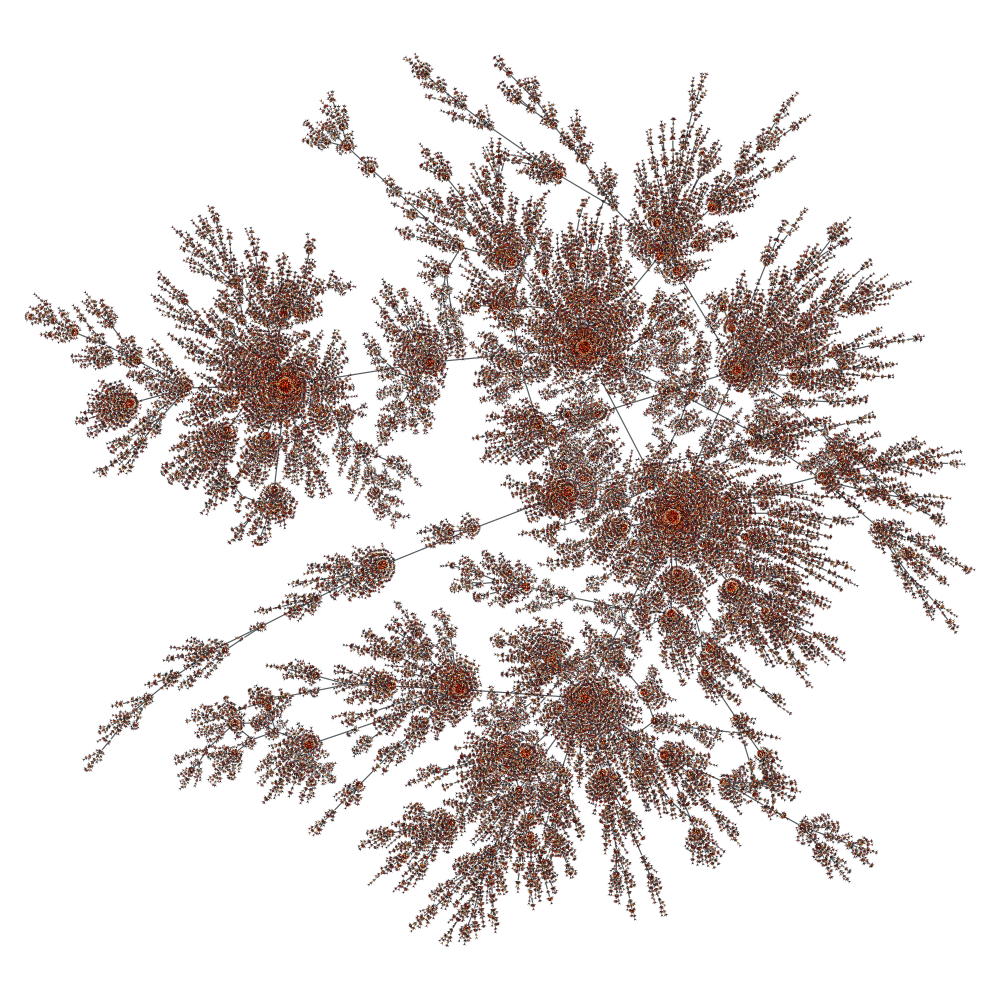

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f74faa27c10, at 0x7f74f817eb90>

In [3]:
g = load_graph("price.xml.gz")
age = g.vertex_properties["age"]

pos = sfdp_layout(g)
graph_draw(g, pos, output_size=(1000, 1000), vertex_color=[1,1,1,0],
           vertex_fill_color=age, vertex_size=1, edge_pen_width=1.2,
           vcmap=matplotlib.cm.gist_heat_r, output="price.png")